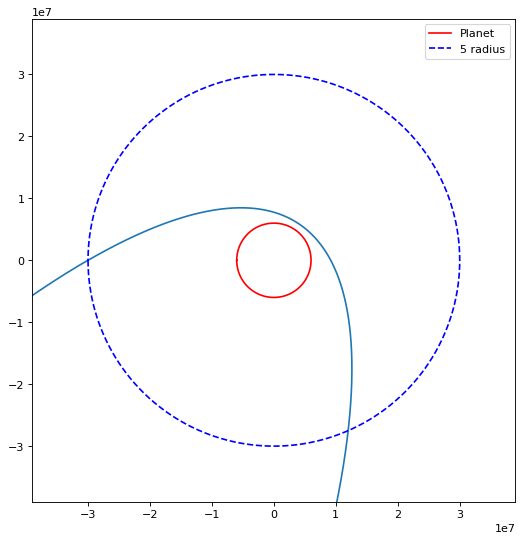

In [87]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67*10**(-11)
mEarth = 6*10**(24)
rEarth = 6*10**6
r0 = 5*rEarth
v0 = 0.5*10**4

sinTheta0 = 0.5

def ConstantC(sinTheta0, v):
    return r0*v*sinTheta0

def excentricity(C, v):
    return np.sqrt(1+(0.5*v**2-G*mEarth/r0)*2*C**2/(G**2*mEarth**2))

def defineConstants(sinTheta0, v):
    C = ConstantC(sinTheta0, v)
    p = C**2/(G*mEarth)
    e = excentricity(C, v)
    return C, p, e

def findIndexTheta0(Radius):
    movedRadius = np.abs(Radius - r0)
    return np.where(movedRadius == min(movedRadius))[0]

def radius(p, e, theta):
    Radius = p/(1+e*np.cos(theta))
    Radius = np.roll(Radius, findIndexTheta0(Radius))
    return Radius

Theta = np.linspace(np.pi, 3*np.pi, 10000)

EarthX = rEarth*np.cos(Theta)
EarthY = rEarth*np.sin(Theta)

def plotFigure(ListXY):
    plt.figure(figsize=(8,8), dpi = 80)
    for xy in ListXY:
        x, y = xy
        plt.plot(x, y)
    plt.plot(EarthX, EarthY, color = 'red', label = 'Planet')
    plt.plot(5*EarthX, 5*EarthY, '--b', label = '5 radius')
    plt.xlim(-1.3*r0, 1.3*r0)
    plt.ylim(-1.3*r0, 1.3*r0)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

C, p, e = defineConstants(sinTheta0, v0)

Radius = radius(p, e, Theta)

x = Radius*np.cos(Theta)
y = Radius*np.sin(Theta)

plotFigure([[x, y]])



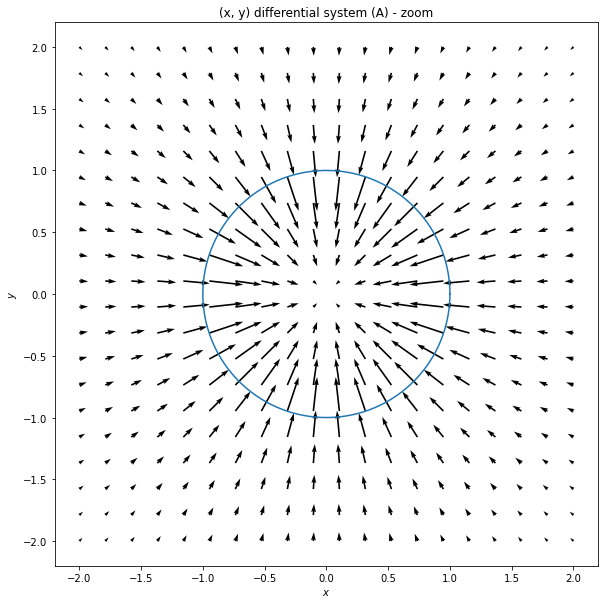

In [88]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dimentionless quantities:
# X_0 = rEarth
# V_0 = Sqrt(G*mEarth/rEarth)
# T_0 = Sqrt(rEarth**3/(G*mEarth))

#G = 6.67*10**(-11)
#mEarth = 6*10**(24)
#rEarth = 6*10**6

def f_x(x, y):
    r = np.sqrt(x**2 + y**2)
    return -x/(r**3)*(r > 1) - x/(1**3)*(r <= 1)

def f_y(x, y):
    r = np.sqrt(x**2 + y**2)
    return -y/(r**3)*(r > 1) - y/(1**3)*(r <= 1)

x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

u, v = np.meshgrid(x, y)

U = f_x(u, v)
V = f_y(u, v)

Theta = np.linspace(0, 2*np.pi, 1000)

EarthX = 1*np.cos(Theta)
EarthY = 1*np.sin(Theta)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.set_title('(x, y) differential system (A) - zoom')
ax1.set(xlabel=r'$x$', ylabel=r'$y$')
Q = ax1.quiver(u, v, U, V, units='width')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(EarthX, EarthY)
#plt.contour(X, Y, V, [0])
#plt.savefig('system_A_zoom.png', dpi = 300)
plt.show()

In [118]:
xMax = 6
yMax = 6

x = np.linspace(-xMax, xMax, 20)
y = np.linspace(-yMax, yMax, 20)

u, v = np.meshgrid(x, y)

U = f_x(u, v)
V = f_y(u, v)

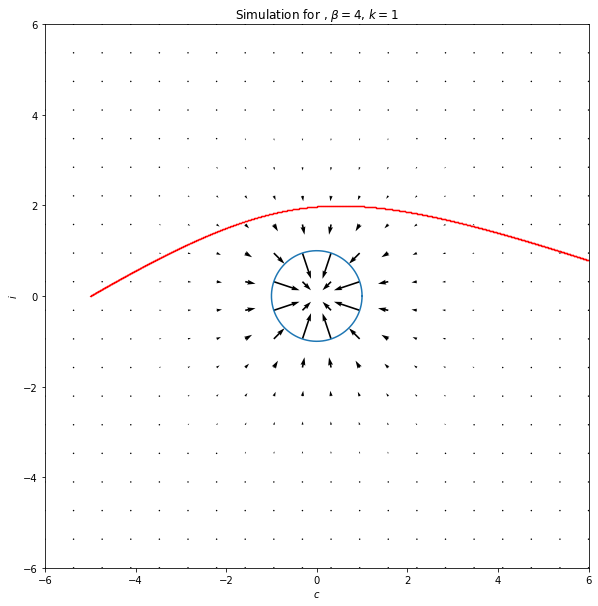

In [119]:
def advance(Vx, Vy, X, Y, t, dt):
    t_index = int(round(t/dt))
    Vx[t_index+1] = Vx[t_index] + f_x(X[t_index],Y[t_index])*dt
    Vy[t_index+1] = Vy[t_index] + f_y(X[t_index],Y[t_index])*dt
    X[t_index+1] = X[t_index] + Vx[t_index]*dt
    Y[t_index+1] = Y[t_index] + Vy[t_index]*dt

r0 = 5
def simulate(v0, sinTheta0):
    dt = 0.001
    Tmax = 50
    size_arr = int(Tmax/dt)+1
    T = np.linspace(0,Tmax,size_arr)
    Vx = np.zeros(size_arr)
    Vy = np.zeros(size_arr)
    X = np.zeros(size_arr)
    Y = np.zeros(size_arr)
    Vx[0] = v0*np.sqrt(1-sinTheta0**2)
    Vy[0] = v0*sinTheta0
    X[0] = -r0
    Y[0] = 0

    for t in T[:-1]:
        advance(Vx, Vy, X, Y, t, dt)
    
    return Vx, Vy, X, Y

Vx, Vy, X, Y = simulate(v0 = 1, sinTheta0 = 0.5)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.set_title(r'Simulation for , $\beta = 4$, $k=1$')
ax1.set(xlabel=r'$c$', ylabel=r'$i$')
Q = ax1.quiver(u, v, U, V, units='width', scale = 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(X, Y, 'ro', ms = 0.1)
plt.xlim(-xMax,xMax)
plt.ylim(-yMax,yMax)
plt.plot(EarthX, EarthY)
#plt.savefig('system_31_evol2', dpi = 300)
plt.show()

In [123]:
def plotFigure(ListXY, listVelocity):
    plt.figure(figsize=(8,8), dpi = 80)
    for i in range(len(ListXY)):
        x, y = ListXY[i]
        plt.plot(x, y, label = str(round(listVelocity[i], 2)))
    plt.plot(EarthX, EarthY, color = 'red', label = 'Planet')
    plt.plot(5*EarthX, 5*EarthY, '--b', label = '5 radius')
    plt.xlim(-xMax, xMax)
    plt.ylim(-yMax, yMax)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

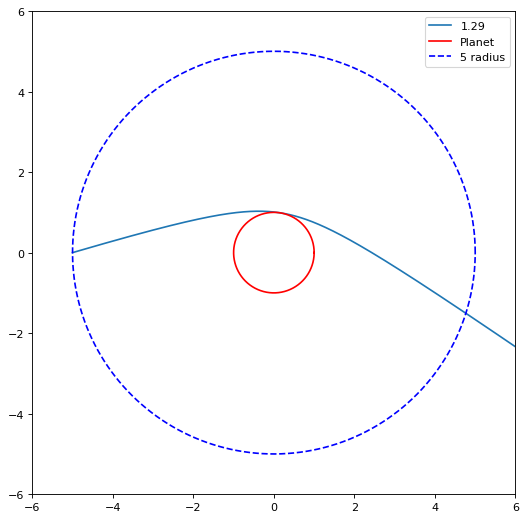

In [124]:
vMin = np.sqrt(1/15)
vRange = [5*vMin]
ListXY = []
for v in vRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)

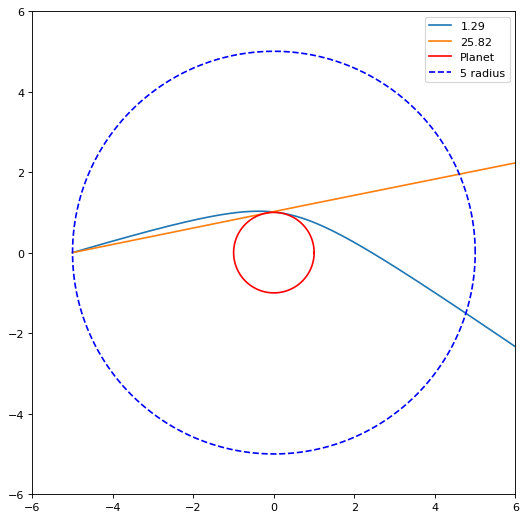

In [125]:
AddvRange = [100*vMin]
vRange += AddvRange
for v in AddvRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)

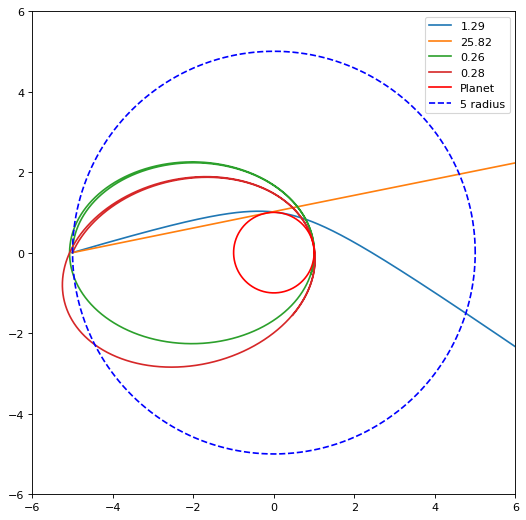

In [126]:
AddvRange = [1.00001*vMin, 1.1*vMin]
vRange += AddvRange
ListXY = []
for v in vRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)